##  [Linear Regression](#1)
##  [Polynomial Regression](#2)
##  [Ridge Regression](#3)
##  [Lasso Regression](#4)
##  [Elastic Regression](#5)

[Pandas Profiling (overview pandas DataFrame)](#6)

### IMPORT LIBERARYS

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
# regression models
from sklearn.preprocessing import StandardScaler # for feature scaling
from sklearn.pipeline import Pipeline # for using pipeline
from sklearn.linear_model import LinearRegression # for linear regression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge # for ridge regression
from sklearn.linear_model import Lasso # for lasso regression
from sklearn.svm import SVR # for support vector regression
from sklearn.tree import DecisionTreeRegressor # for decisiton tree regression
from sklearn.ensemble import RandomForestRegressor # for random forest regression
# hyptertuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# extra
import pandas_profiling
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from collections import Counter
from IPython.core.display import display, HTML
sns.set_style('darkgrid')
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/insurance/insurance.csv


## IMPORT DATASET

In [2]:
insurance_dataset = pd.read_csv("/kaggle/input/insurance/insurance.csv")

## OVERVIEW OF DATA

In [3]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Pandas Profiling<a id='6'></a>

In [4]:
pandas_profiling.ProfileReport(insurance_dataset)

In [5]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


* **age** : age of person 
* **sex** : gender of person
* **bmi** : Body mass index (BMI) is a value derived from the mass (weight) and height of a person.
* **children** : number of child covered by helth insurance
* **smoker** : person smokes or not
* **region** : perdon's residential area
* **charges** : charges can be given by insurance

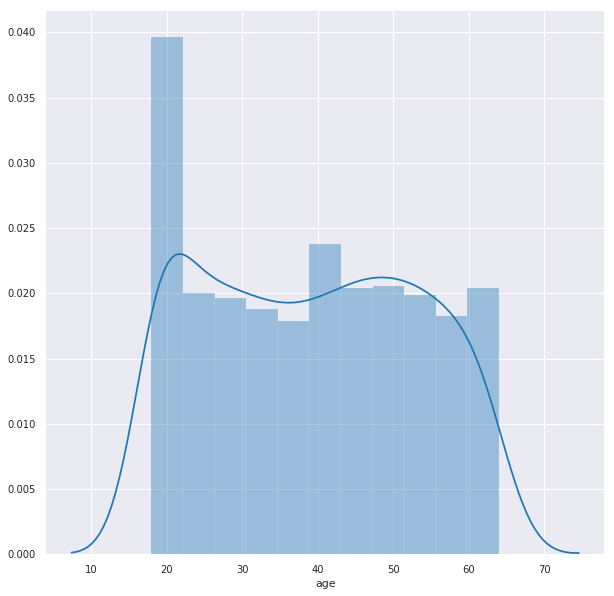

In [6]:
plt.figure(figsize=(10,10))
sns.distplot(insurance_dataset.age)
plt.show()

* All ages are between 20 to 63
* age of 20 are higher compare to other

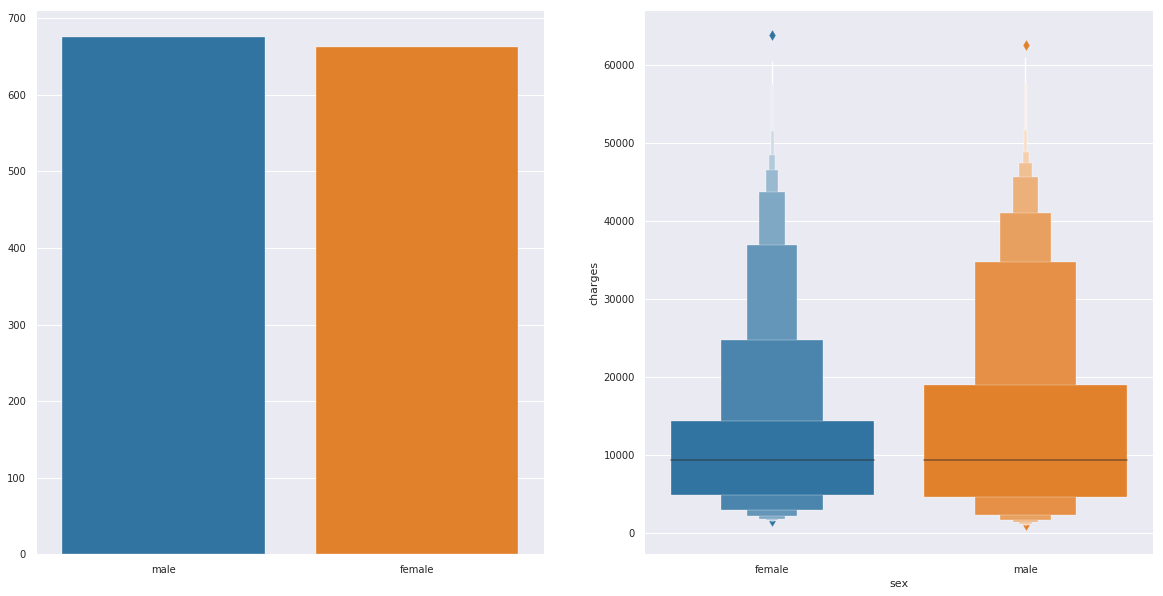

In [7]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=insurance_dataset.sex.value_counts().index , y= insurance_dataset.sex.value_counts().values)
plt.subplot(1,2,2)
sns.boxenplot(x="sex",y="charges",data=insurance_dataset)
plt.show()

* number of male and female in dataset are almost equal

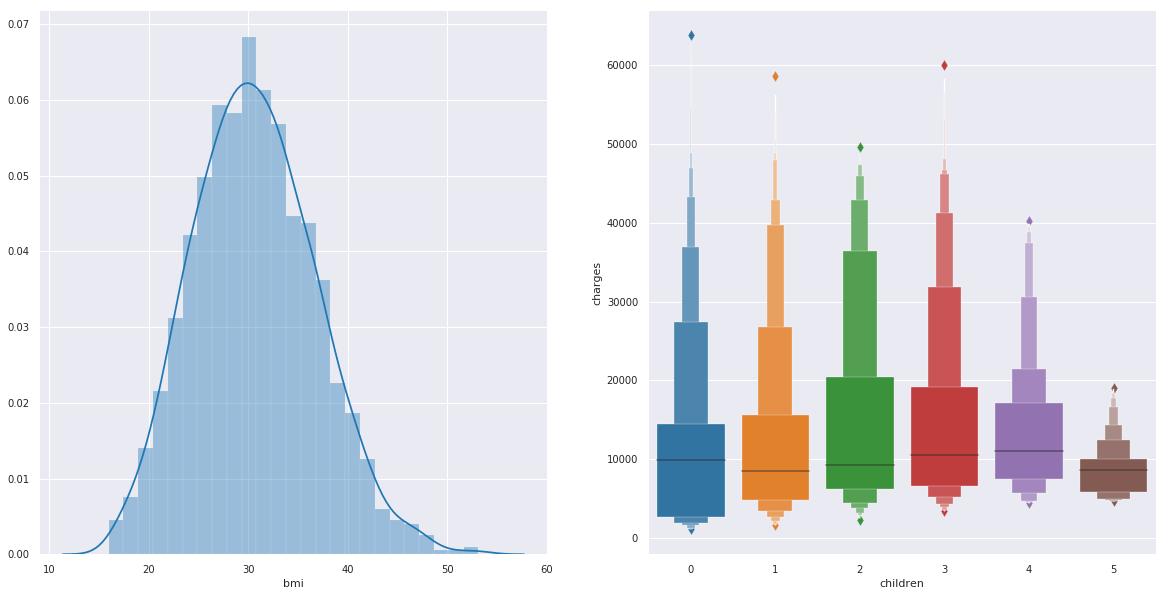

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(insurance_dataset.bmi)
plt.subplot(1,2,2)
sns.boxenplot(x="children",y="charges",data=insurance_dataset)
plt.show()

* bmi column in Dataset is normalized data

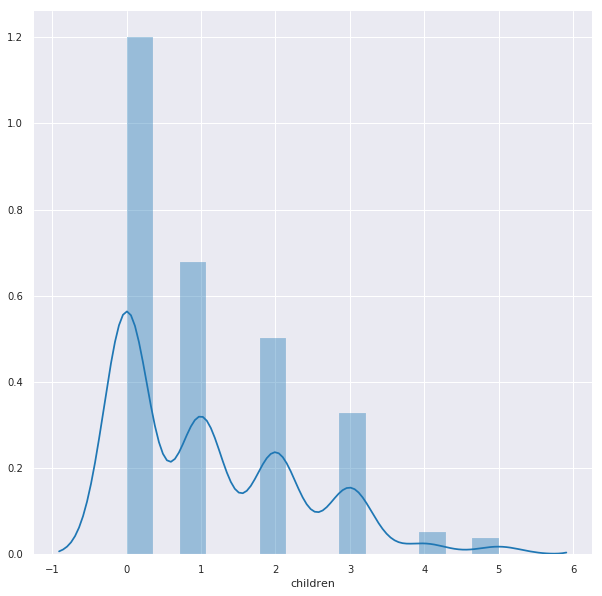

In [9]:
plt.figure(figsize=(10,10))
sns.distplot(insurance_dataset.children)
plt.show()

* children dataset is natural 

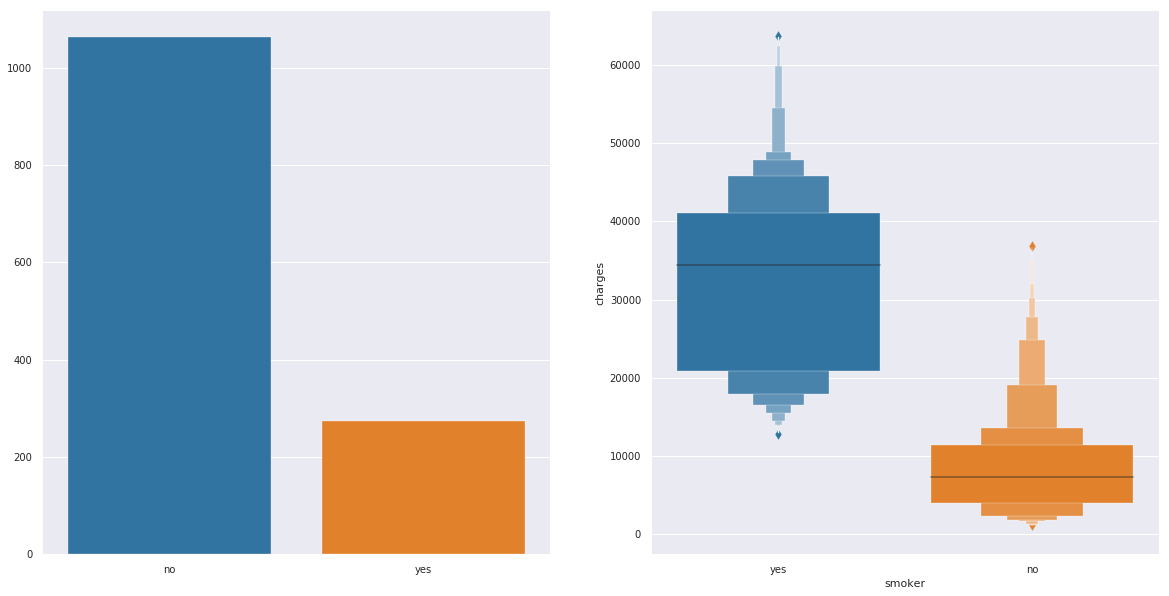

In [10]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=insurance_dataset.smoker.value_counts().index , y= insurance_dataset.smoker.value_counts().values)
plt.subplot(1,2,2)
sns.boxenplot(x="smoker",y="charges",data=insurance_dataset)
plt.show()

* number of smoker is less 
* smokers are have to get high insurance compare to 

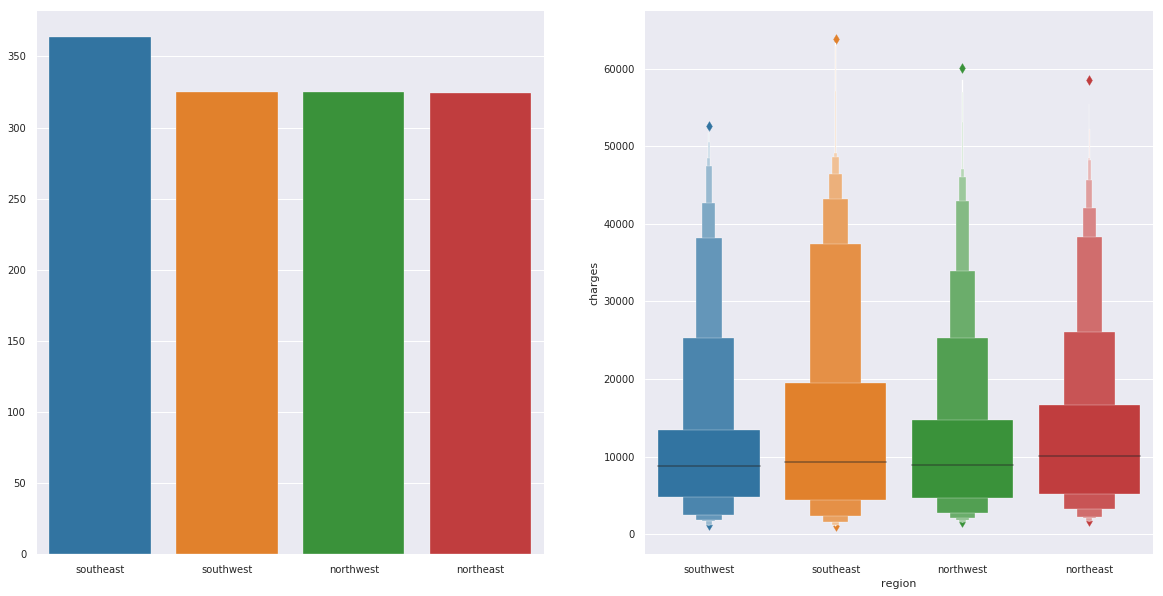

In [11]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.barplot(x=insurance_dataset.region.value_counts().index , y= insurance_dataset.region.value_counts().values)
plt.subplot(1,2,2)
sns.boxenplot(x="region",y="charges",data=insurance_dataset)
plt.show()

* all regin are almost same distributed

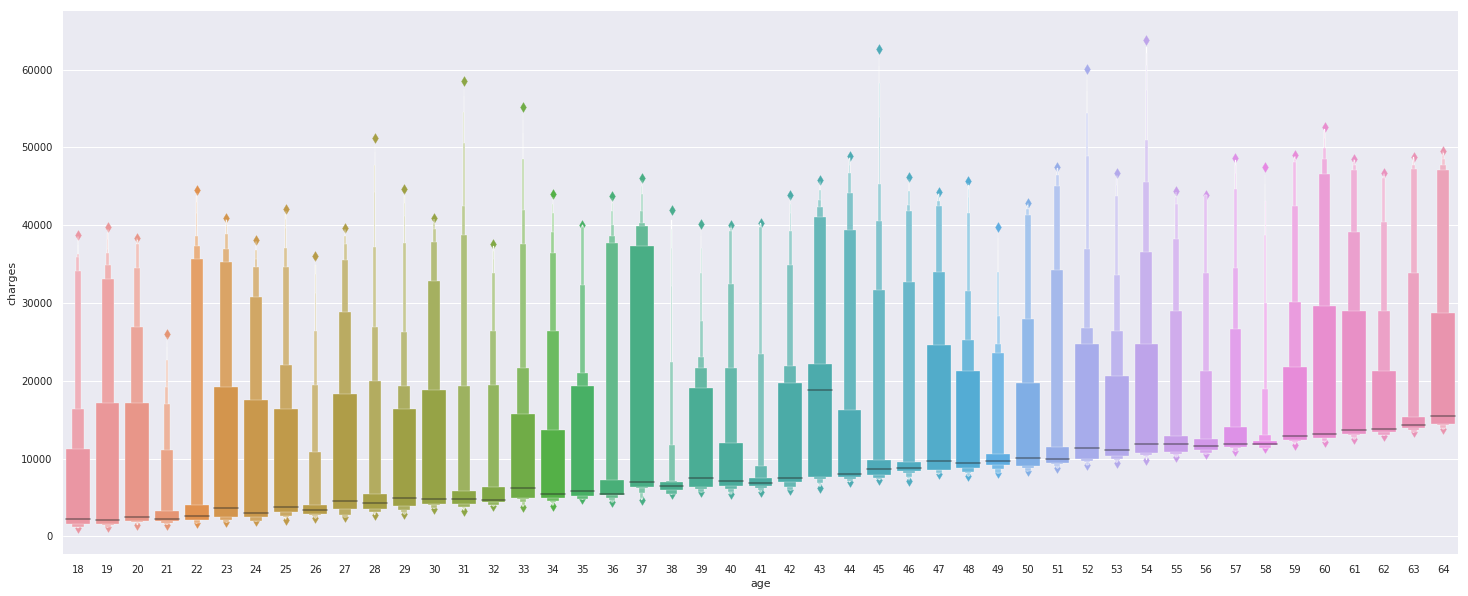

In [12]:
plt.figure(figsize=(25,10))
sns.boxenplot(x="age" , y="charges", data = insurance_dataset)
plt.show()

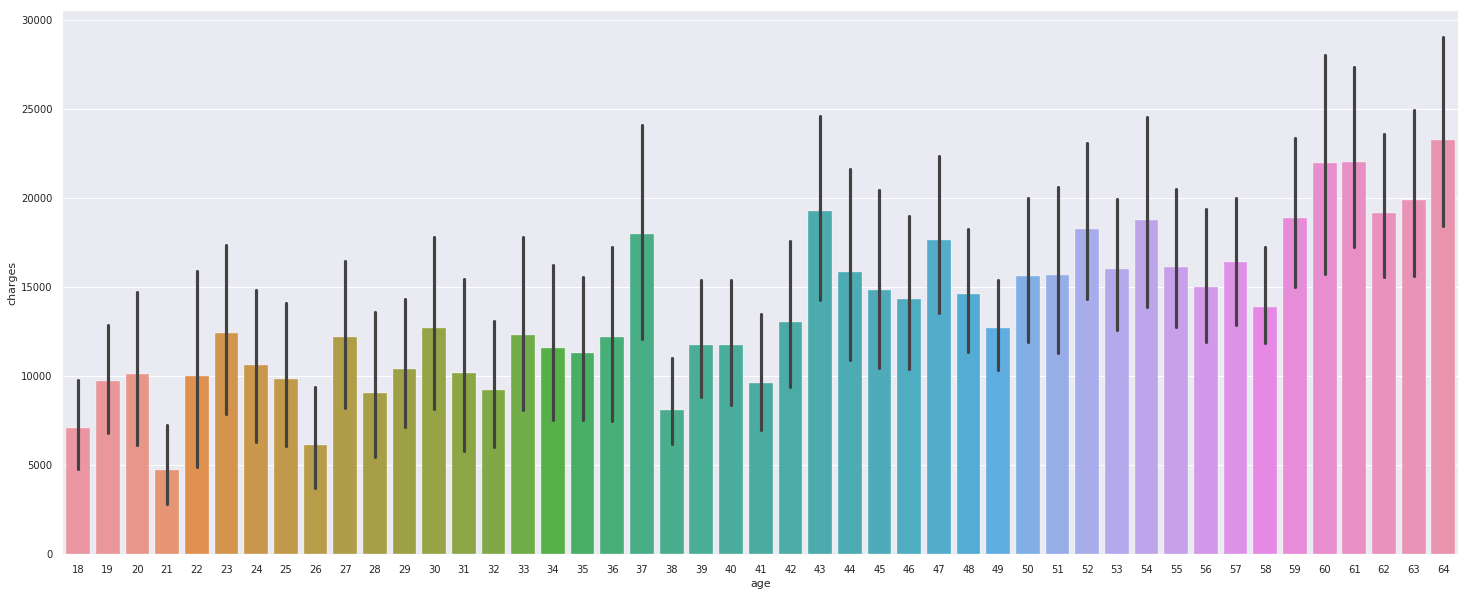

In [13]:
plt.figure(figsize=(25,10))
sns.barplot(x="age" , y="charges", data = insurance_dataset)
plt.show()

* we can see that at high ages charges are also increse
* at age between 24-34 male charge is higher then female
* also 40-56 male charge higher 

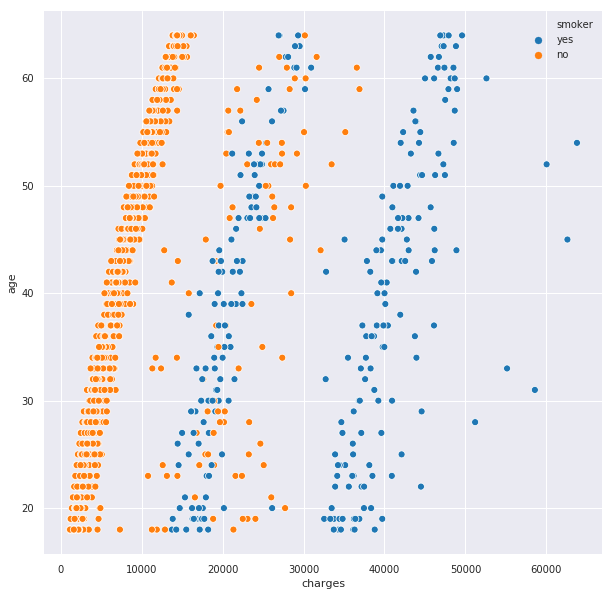

In [14]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="charges",y="age",data=insurance_dataset,hue="smoker")
plt.show()

* Those are smoker they are getting less chares compare to non-smoker

In [15]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

* there is not any null value in Dataset

In [16]:
insurance_dataset = pd.get_dummies(insurance_dataset)
insurance_dataset.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [17]:
X =insurance_dataset.drop("charges",axis =1).values
y =insurance_dataset["charges"].values.reshape(-1,1)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)

In [19]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (1070, 11)
Shape of X_test:  (268, 11)
Shape of y_train:  (1070, 1)
Shape of y_test (268, 1)


[]

<Figure size 720x720 with 0 Axes>

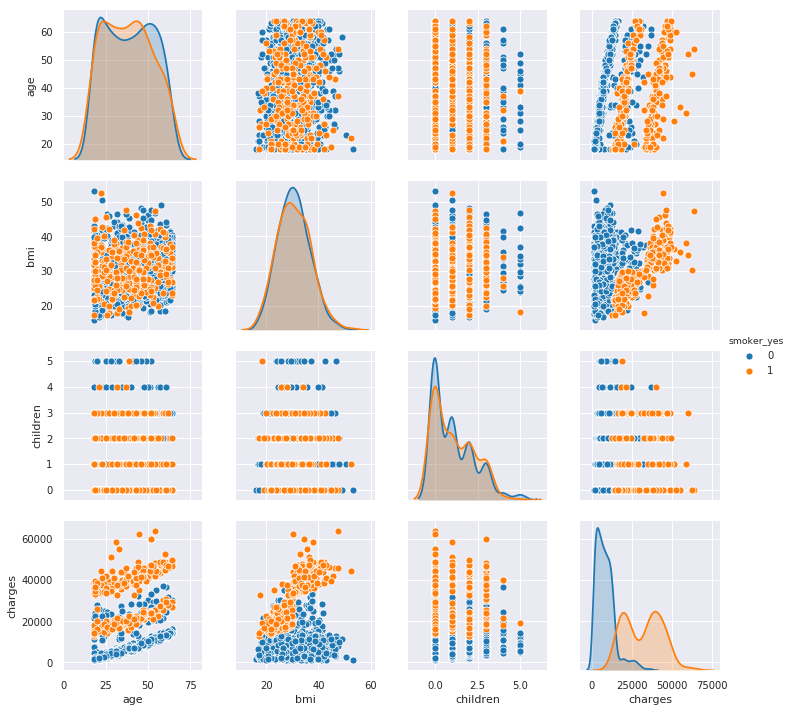

In [20]:
plt.figure(figsize=(10,10))
sns.pairplot(insurance_dataset,vars=['age','bmi','children','charges'],hue='smoker_yes')
plt.plot()

# MODELS

## LINEAR REGRESSION<a id='1'></a>

In [21]:
Linear_regression = LinearRegression()
Linear_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
# K-fold Cross validation 
# cv = number of folds of the dataset
cv_result = cross_val_score(estimator=Linear_regression,X=X,y=y,cv=10)
print("CV(K-fold) result(mean of 10) :",cv_result.mean())

# Pridicting on Train set result
# calculate R2 score
y_pridicted_train = Linear_regression.predict(X_train)
R2_score_linearregression_train = r2_score(y_train,y_pridicted_train)
print("R2 Score : ",R2_score_linearregression_train)

# Pridicting on Test set result
y_pridicted_test = Linear_regression.predict(X_test)
R2_score_linearregression_test = r2_score(y_test,y_pridicted_test)
print("R2 Score : ",R2_score_linearregression_test)

# Root mean square error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pridicted_test))
print("RMSE : ",rmse)

CV(K-fold) result(mean of 10) : 0.7445006998667603
R2 Score :  0.7548625668706685
R2 Score :  0.7341854344194202
RMSE :  6303.795448794734


## GRAPH PRIDICTEING AND ORIGINAL

In [23]:
# convert to 1-D Array
#y_train.ravel()

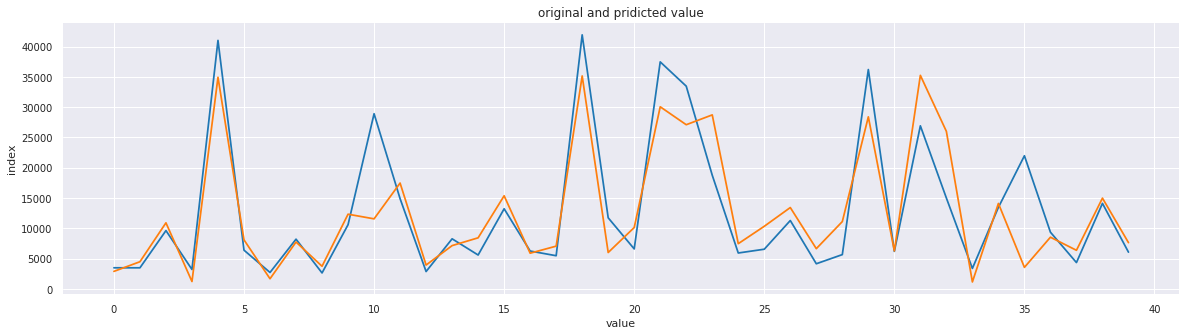

In [24]:
Linear_model_graph = pd.DataFrame({"y_train":y_train.ravel(),"y_pridicted_train":y_pridicted_train.ravel()})
plt.figure(figsize=(20,5))
sns.lineplot(x=Linear_model_graph.index[:40],y=Linear_model_graph.y_train[:40])
sns.lineplot(x=Linear_model_graph.index[:40],y=Linear_model_graph.y_pridicted_train[:40])
plt.xlabel("value")
plt.ylabel("index")
plt.title("original and pridicted value")
plt.show()

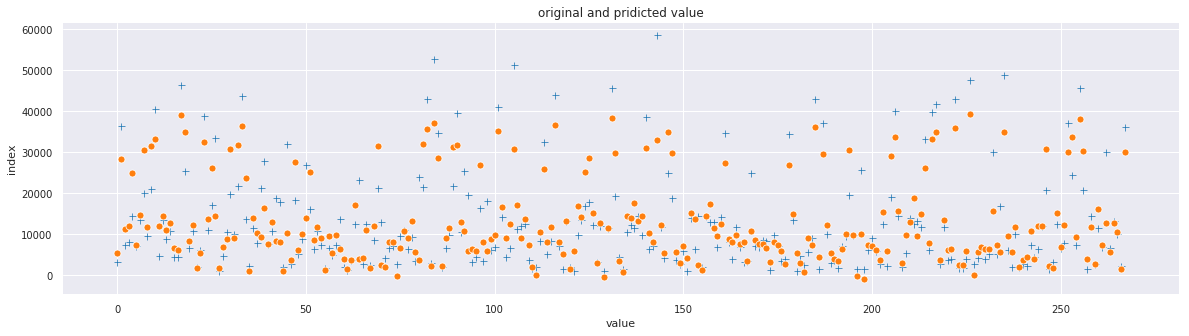

In [25]:
poly_model_graph = pd.DataFrame({"y_train":y_test.ravel(),"y_pridicted_train":y_pridicted_test.ravel()})
plt.figure(figsize=(20,5))
sns.scatterplot(x=poly_model_graph.index,y=poly_model_graph.y_train,marker='+')
sns.scatterplot(x=poly_model_graph.index,y=poly_model_graph.y_pridicted_train,marker='o')
plt.xlabel("value")
plt.ylabel("index")
plt.title("original and pridicted value")
plt.show()

## POLYNOMIAL REGRESSION<a id='2'></a>

In [26]:
from sklearn.preprocessing import PolynomialFeatures # for adding polynomial features
poly_regression = PolynomialFeatures(degree=2)
X_train_poly = poly_regression.fit_transform(X_train)
poly_regression.fit(X_train_poly,y_train)

regressor_poly2 = LinearRegression()
regressor_poly2.fit(X_train_poly,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
# predicting cross validation 
cv_regressot_poly2 = cross_val_score(estimator=regressor_poly2,X=poly_regression.fit_transform(X),y=y,cv=10)

# R2 score train
y_priediction_poly2_train  = regressor_poly2.predict(X_train_poly)
r2_score_y_train = r2_score(y_train,y_priediction_poly2_train)
print("r2_score_y_train : ", r2_score_y_train )

# R2 score test
y_priediction_poly2_test  = regressor_poly2.predict(poly_regression.fit_transform(X_test))
r2_score_y_test = r2_score(y_test,y_priediction_poly2_test)
print("r2_score_y_test : ",r2_score_y_test)

# root mean square error
from math import sqrt 
rmse_test = sqrt(mean_squared_error(y_priediction_poly2_test,y_test))
print("rmse_test :",rmse_test)

r2_score_y_train :  0.8461071141618033
r2_score_y_test :  0.8449514903518912
rmse_test : 4814.448250663463


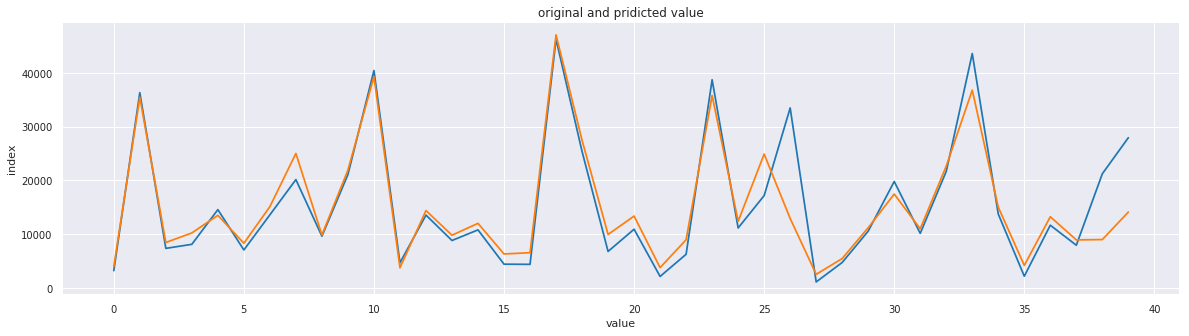

In [28]:
poly_model_graph = pd.DataFrame({"y_train":y_test.ravel(),"y_pridicted_train":y_priediction_poly2_test.ravel()})
plt.figure(figsize=(20,5))
sns.lineplot(x=poly_model_graph.index[:40],y=poly_model_graph.y_train[:40])
sns.lineplot(x=poly_model_graph.index[:40],y=poly_model_graph.y_pridicted_train[:40])
plt.xlabel("value")
plt.ylabel("index")
plt.title("original and pridicted value")
plt.show()

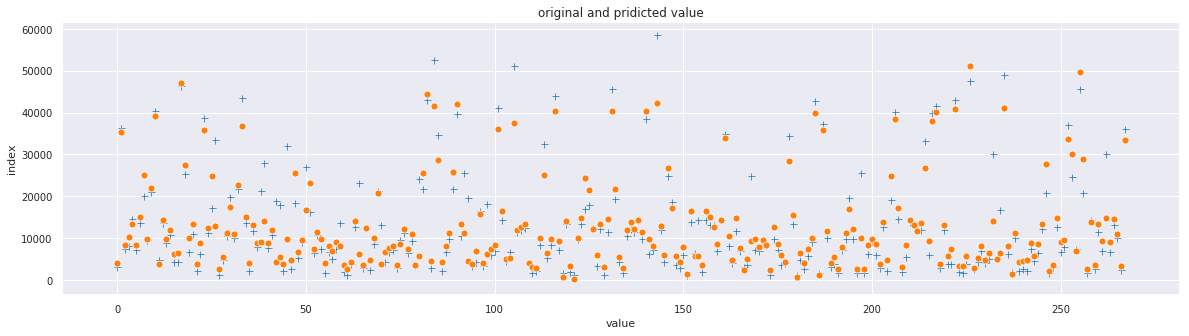

In [29]:
poly_model_graph = pd.DataFrame({"y_train":y_test.ravel(),"y_pridicted_train":y_priediction_poly2_test.ravel()})
plt.figure(figsize=(20,5))
sns.scatterplot(x=poly_model_graph.index,y=poly_model_graph.y_train,marker='+')
sns.scatterplot(x=poly_model_graph.index,y=poly_model_graph.y_pridicted_train,marker='o')
plt.xlabel("value")
plt.ylabel("index")
plt.title("original and pridicted value")
plt.show()

# RIDGE REGRESSION<a id='3'></a>

In [30]:
def ridge_regression(X_data,y_data,X_test,y_test, alpha):
    
    #fit ridge regression 
    ridge_reg = Ridge(alpha=alpha,normalize=True)
    ridge_reg.fit(X_data,y_data)
    
    y_pred_train = ridge_reg.predict(X_data)
    y_pred_test = ridge_reg.predict(X_test)
    
#     #plot graph
    
#     poly_model_graph = pd.DataFrame({"y_data":y_data.ravel(),"y_pridicted_train":y_pred_train.ravel()})
#     plt.figure(figsize=(20,5))
#     sns.lineplot(x=poly_model_graph.index[:80],y=poly_model_graph.y_data[:80])
#     sns.lineplot(x=poly_model_graph.index[:80],y=poly_model_graph.y_pridicted_train[:80])
#     plt.xlabel("value")
#     plt.ylabel("index")
#     plt.title("original and pridicted value in train dataset at alpha = {}".format(alpha))
#     plt.show()
   
#     poly_model_graph = pd.DataFrame({"y_data":y_test.ravel(),"y_pridicted_train":y_pred_test.ravel()})
#     plt.figure(figsize=(20,5))
#     sns.lineplot(x=poly_model_graph.index[:80],y=poly_model_graph.y_data[:80])
#     sns.lineplot(x=poly_model_graph.index[:80],y=poly_model_graph.y_pridicted_train[:80])
#     plt.xlabel("value")
#     plt.ylabel("index")
#     plt.title("original and pridicted value in train dataset at alpha = {}".format(alpha))
#     plt.show()
    
    #check errors
    print("\n\nfor alpha = {}".format(alpha))
    
    # R2 score train
    r2_score_y_train = r2_score(y_train,y_pred_train)
    print("r2_score_y_train : ", r2_score_y_train )

    # R2 score test
    r2_score_y_test = r2_score(y_test,y_pred_test)
    print("r2_score_y_test : ",r2_score_y_test)

    # root mean square error
    from math import sqrt 
    rmse_test = sqrt(mean_squared_error(y_pred_test,y_test))
    print("rmse_test :",rmse_test)
    rmse_test = sqrt(mean_squared_error(y_pred_train,y_data))
    print("rmse_train :",rmse_test)
    
    return [r2_score_y_train,r2_score_y_test,rmse_test] , ridge_reg.coef_

In [31]:
r2_train_score_r = []
r2_test_score_r = []
rms_score_r = []
cofficient_r = []
for Alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    temp , coff = ridge_regression(X_train,y_train,X_test,y_test,Alpha)
    r2_train_score_r.append(temp[0])
    r2_test_score_r.append(temp[1])
    rms_score_r.append(temp[2])
    cofficient_r.append(coff)



for alpha = 1e-15
r2_score_y_train :  0.7548625668706687
r2_score_y_test :  0.7341854344194202
rmse_test : 6303.795448794734
rmse_train : 5978.20275466435


for alpha = 1e-10
r2_score_y_train :  0.7548625668706685
r2_score_y_test :  0.7341854344171774
rmse_test : 6303.795448821327
rmse_train : 5978.202754664351


for alpha = 1e-08
r2_score_y_train :  0.7548625668706685
r2_score_y_test :  0.7341854341951464
rmse_test : 6303.795451454063
rmse_train : 5978.202754664352


for alpha = 0.0001
r2_score_y_train :  0.7548625641010529
r2_score_y_test :  0.7341831891995246
rmse_test : 6303.822071446209
rmse_train : 5978.202788435866


for alpha = 0.001
r2_score_y_train :  0.7548622902655001
r2_score_y_test :  0.7341627592575621
rmse_test : 6304.064313921808
rmse_train : 5978.20612746893


for alpha = 0.01
r2_score_y_train :  0.7548352585836178
r2_score_y_test :  0.7339367160764392
rmse_test : 6306.743938410225
rmse_train : 5978.535731004211


for alpha = 1
r2_score_y_train :  0.655047195208823


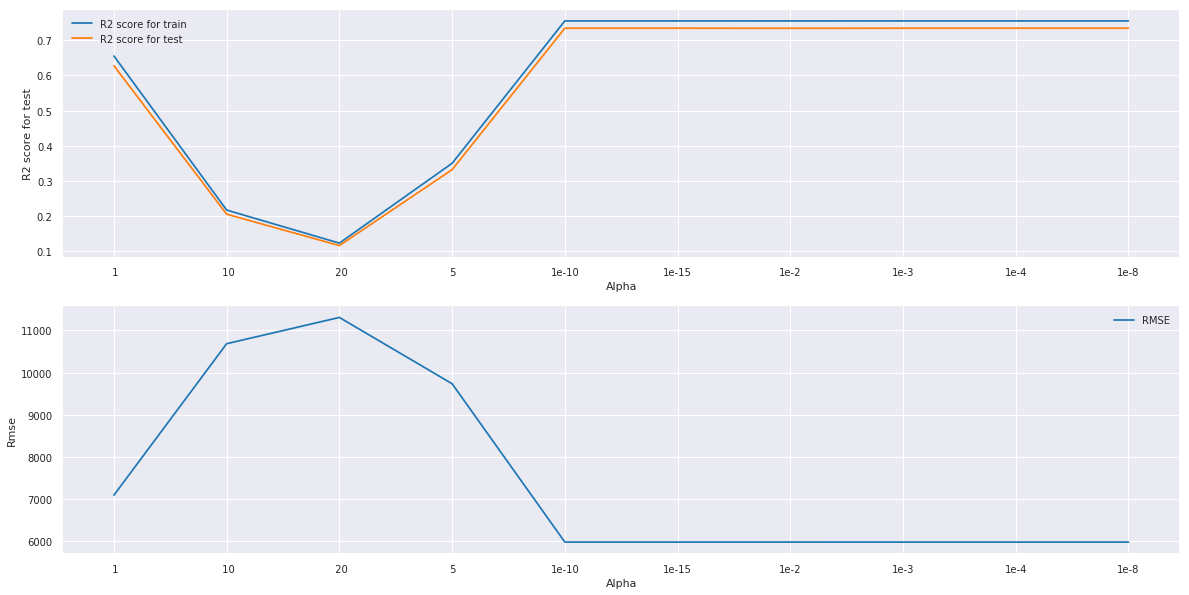

In [32]:
graph = pd.DataFrame({"Alpha":["1e-15", "1e-10", "1e-8", "1e-4","1e-3","1e-2"," 1"," 5"," 10"," 20"],"R2 score for train":r2_train_score_r,
                      "R2 score for test":r2_test_score_r,"Rmse":rms_score_r})
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.lineplot(x=graph.Alpha,y=graph["R2 score for train"],label="R2 score for train")
sns.lineplot(x=graph.Alpha,y=graph["R2 score for test"],label="R2 score for test")
plt.subplot(2,1,2)
sns.lineplot(x=graph.Alpha,y=graph["Rmse"],label="RMSE")
plt.show()

In [33]:
#disply cofficient
cofficient_dataframe = pd.DataFrame()

In [34]:
def lasso_regression(X_train,y_train,X_test,y_test,alpha):
    lasso_reg = Lasso(alpha=alpha,normalize=True)
    lasso_reg.fit(X_train,y_train)
    
    y_pred_train = lasso_reg.predict(X_train)
    
    y_pred_test = lasso_reg.predict(X_test)
    
    #check errors
    print("\n\nfor alpha = {}".format(alpha))
    
    # R2 score train
    r2_score_y_train = r2_score(y_train,y_pred_train)
    print("r2_score_y_train : ", r2_score_y_train )

    # R2 score test
    r2_score_y_test = r2_score(y_test,y_pred_test)
    print("r2_score_y_test : ",r2_score_y_test)

    # root mean square error
    from math import sqrt 
    rmse_test = sqrt(mean_squared_error(y_pred_test,y_test))
    print("rmse_test :",rmse_test)
    rmse_test = sqrt(mean_squared_error(y_pred_train,y_train))
    print("rmse_train :",rmse_test)
    return [r2_score_y_train,r2_score_y_test,rmse_test] , lasso_reg.coef_

In [35]:
r2_train_score_l = []
r2_test_score_l = []
rms_score_l = []
cofficient_l = []
for Alpha in [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 1, 5, 10, 20]:
    temp , coff = lasso_regression(X_train,y_train,X_test,y_test,Alpha)
    r2_train_score_l.append(temp[0])
    r2_test_score_l.append(temp[1])
    rms_score_l.append(temp[2])
    cofficient_l.append(coff)



for alpha = 1e-15
r2_score_y_train :  0.7548625668706685
r2_score_y_test :  0.7341854344194202
rmse_test : 6303.795448794734
rmse_train : 5978.202754664351


for alpha = 1e-10
r2_score_y_train :  0.7548625668706685
r2_score_y_test :  0.7341854344193708
rmse_test : 6303.795448795319
rmse_train : 5978.202754664351


for alpha = 1e-08
r2_score_y_train :  0.7548625668706685
r2_score_y_test :  0.7341854344145656
rmse_test : 6303.795448852297
rmse_train : 5978.202754664351


for alpha = 0.0001
r2_score_y_train :  0.7548625668699911
r2_score_y_test :  0.7341853852396427
rmse_test : 6303.796031944199
rmse_train : 5978.202754672613


for alpha = 0.001
r2_score_y_train :  0.7548625668024586
r2_score_y_test :  0.7341849397058706
rmse_test : 6303.801314860736
rmse_train : 5978.202755496076


for alpha = 0.01
r2_score_y_train :  0.7548625600358392
r2_score_y_test :  0.7341804751869642
rmse_test : 6303.8542526475385
rmse_train : 5978.202838005347


for alpha = 1
r2_score_y_train :  0.7547945598810

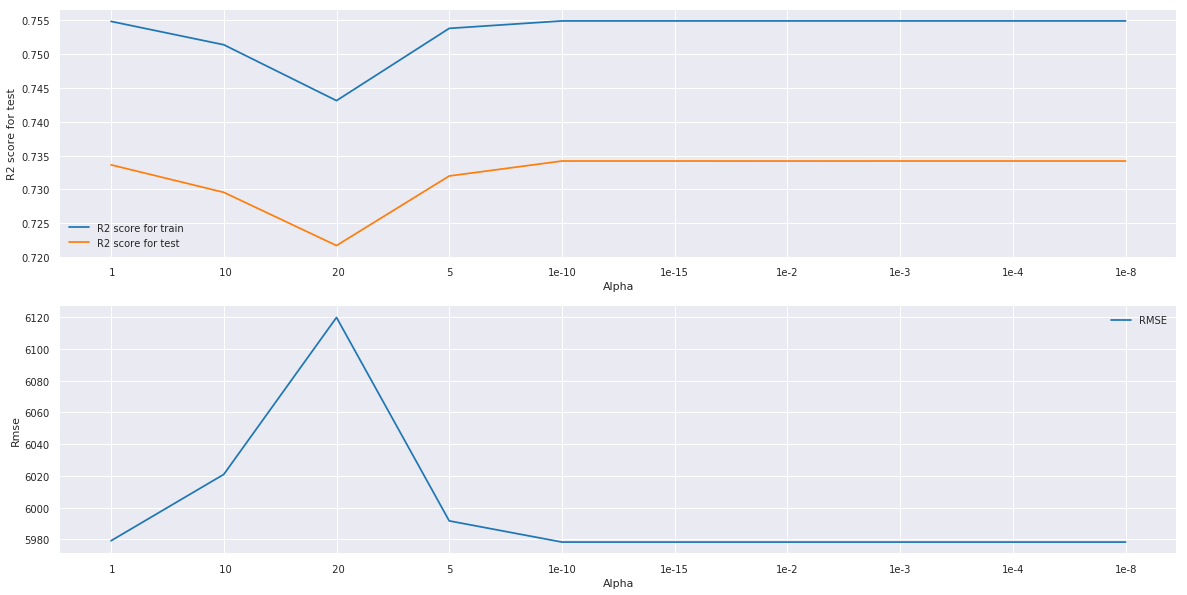

In [36]:
graph_1 = pd.DataFrame({"Alpha":["1e-15", "1e-10", "1e-8", "1e-4","1e-3","1e-2"," 1"," 5"," 10"," 20"],"R2 score for train":r2_train_score_l,
                      "R2 score for test":r2_test_score_l,"Rmse":rms_score_l})
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.lineplot(x=graph_1.Alpha,y=graph_1["R2 score for train"],label="R2 score for train")
sns.lineplot(x=graph_1.Alpha,y=graph_1["R2 score for test"],label="R2 score for test")
plt.subplot(2,1,2)
sns.lineplot(x=graph_1.Alpha,y=graph_1["Rmse"],label="RMSE")
plt.show()

# COMPARISION BETWEEN LASSO AND RIDGE<a id='4'></a>

## r2 train score

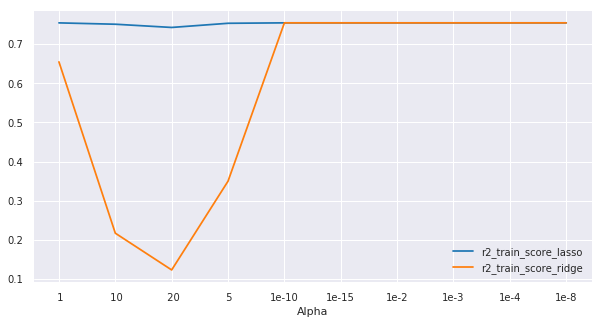

In [37]:
plt.figure(figsize=(10,5))
sns.lineplot(x=graph_1.Alpha,y=r2_train_score_l,label="r2_train_score_lasso")
sns.lineplot(x=graph_1.Alpha,y=r2_train_score_r,label="r2_train_score_ridge")
plt.show()

## r2 train score

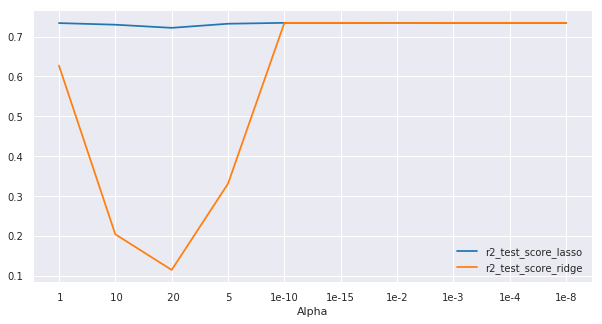

In [38]:
plt.figure(figsize=(10,5))
sns.lineplot(x=graph_1.Alpha,y=r2_test_score_l,label="r2_test_score_lasso")
sns.lineplot(x=graph_1.Alpha,y=r2_test_score_r,label="r2_test_score_ridge")
plt.show()

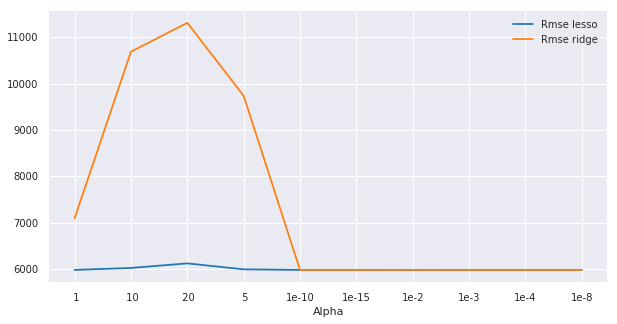

In [39]:
plt.figure(figsize=(10,5))
sns.lineplot(x=graph_1.Alpha,y=rms_score_l,label="Rmse lesso")
sns.lineplot(x=graph_1.Alpha,y=rms_score_r,label="Rmse ridge")
plt.show()

# ELASTIC REGRESSION<a id='5'></a>

elastic regression used when data is highly correlated

In [40]:
Elastic_regression = ElasticNet()
Elastic_regression.fit(X_train,y_train)

y_predicted_train = Elastic_regression.predict(X_train)

y_predicted_test = Elastic_regression.predict(X_test)

# R2 score train
r2_score_y_train = r2_score(y_train,y_predicted_train)
print("r2_score_y_train : ", r2_score_y_train )

# R2 score test
r2_score_y_test = r2_score(y_test,y_predicted_test)
print("r2_score_y_test : ",r2_score_y_test)

# root mean square error
from math import sqrt 
rmse_test = sqrt(mean_squared_error(y_predicted_test,y_test))
print("rmse_test :",rmse_test)
rmse_test = sqrt(mean_squared_error(y_predicted_train,y_train))
print("rmse_train :",rmse_test)

r2_score_y_train :  0.5237301629943302
r2_score_y_test :  0.5014065246170298
rmse_test : 8633.482646502078
rmse_train : 8332.826936406254
